Proyecto UAM: LIBERACIÓN CONTROLADA DE FÁRMACOS MEDIANTE NANOPARTÍCULAS MAGNÉTICAS ASISTIDO POR pH DEL JUGO GÁSTRICO



Regresión lineal aplicada en la medición de concentraciones de Ibuprofeno en soluciones ácidas por medio de Espectrofotometría UV-Vis.

El siguiente código tiene como fin emplear un método númerico (Regresión Lineal) para determinar la concentración del fármaco Ibuprofeno en soluciones ácidas por medio de Espectrofotometría UV-Vis. Se midieron 6 concentraciones de Ibuprofeno en fluido gástrico simulado (pH 1.2), cada muestra fue medida por triplicado y se calculó su espectro UV promedio. 
En dichos espectros se encontró el punto máximo de absorbancia en toda la longitud de onda, con esto se contruyó el modelo de regresión líneal, obteniendo una ecuación que permite determinar concentraciones del fármaco en soluciones ácidas.

In [36]:
#Improtamos las librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Cálculo del espectro UV promedio referente a las tres medidas tomadas de la concentración de 1 (mg/ml) de la solución de Ibuprofeno

In [37]:
#Lectura de datos 
TablaC1= pd.read_excel('Medidas c1.xlsx')
TablaC1

,wavelength,value (m1_1),value (m1_2),value (m1_3)
0,220,2.222,2.187,2.187
1,221,2.222,2.187,2.187
2,222,2.222,2.187,2.187
3,223,2.222,2.187,2.187
4,224,2.222,2.187,2.155
...,...,...,...,...
176,396,0.083,0.087,0.086
177,397,0.083,0.086,0.086
178,398,0.083,0.086,0.087
179,399,0.083,0.086,0.087


In [38]:
#Seleccionamos los datos de forma individual
C1M1 = TablaC1['value (m1_1)']
C1M2 = TablaC1['value (m1_2)']
C1M3 = TablaC1['value (m1_3)']
wavelength = TablaC1['wavelength']


In [39]:
#Se calcula el espectro promedio referente a la toma de las medidas
C1 = (C1M1+ C1M2 + C1M3) /3

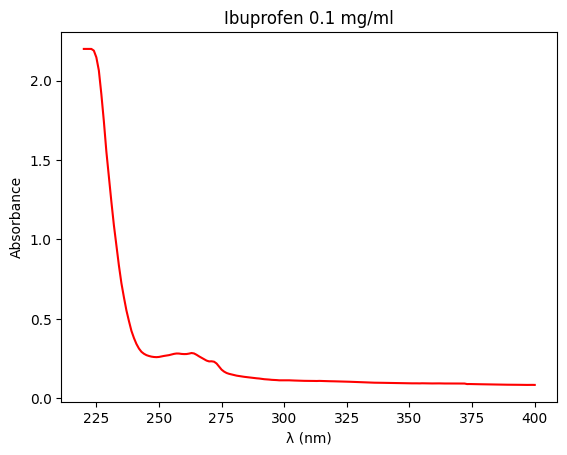

In [40]:
#Graficamos el Espectro UV del Ibuprofeno en una conentración de 0.1 mg/ml
plt.figure() 
plt.plot(wavelength, C1, color='red', linestyle='solid')
plt.title('Ibuprofen 0.1 mg/ml')
plt.xlabel('λ (nm)')
plt.ylabel('Absorbance')
plt.show() 

Cálculo del espectro UV promedio y su absorbancia máxima referente a las tres medidas tomadas de la concentración de 0.5 mg/ml de la solución de Ibuprofeno

In [41]:
#Lectura de datos
TablaC2= pd.read_excel('Medidas c2.xlsx')
TablaC2

,wavelength,value(m2_1),value(m2_2),value(m2_3)
0,220,1.300,1.329,1.347
1,221,1.301,1.327,1.344
2,222,1.285,1.314,1.328
3,223,1.264,1.294,1.308
4,224,1.240,1.269,1.283
...,...,...,...,...
176,396,0.048,0.043,0.042
177,397,0.048,0.043,0.042
178,398,0.048,0.043,0.042
179,399,0.048,0.043,0.042


In [42]:
#Seleccionamos los datos de forma individual
C2M1 = TablaC2['value(m2_1)']
C2M2 = TablaC2['value(m2_2)']
C2M3 = TablaC2['value(m2_3)']
wavelength = TablaC1['wavelength']

In [43]:
#Se calcula el espectro promedio referente a la toma de las medidas
C2 = (C2M1+ C2M2 + C2M3) /3

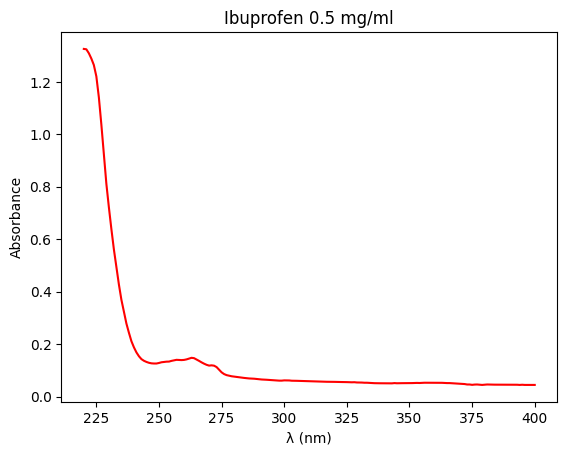

In [44]:
#Graficamos el Espectro UV del Ibuprofeno en una conentración de 0.5 mg/ml
plt.figure() 
plt.plot(wavelength, C2, color='red', linestyle='solid')
plt.title('Ibuprofen 0.5 mg/ml')
plt.xlabel('λ (nm)')
plt.ylabel('Absorbance')
plt.show() 

Cálculo del espectro UV promedio y su absorbancia máxima referente a las tres medidas tomadas de la concentración de 0.25 mg/ml de la solución de Ibuprofeno

In [45]:
#Lectura de datos
TablaC3= pd.read_excel('Medidas c3.xlsx')
TablaC3

,wavelength,value(m3_1),value(m3_2),value(m3_3)
0,220,0.679,0.698,0.704
1,221,0.678,0.693,0.702
2,222,0.670,0.684,0.692
3,223,0.657,0.672,0.680
4,224,0.644,0.660,0.666
...,...,...,...,...
176,396,0.025,0.026,0.027
177,397,0.025,0.026,0.027
178,398,0.025,0.026,0.026
179,399,0.025,0.026,0.027


In [46]:
#Seleccionamos los datos de forma individual
C3M1 = TablaC3['value(m3_1)']
C3M2 = TablaC3['value(m3_2)']
C3M3 = TablaC3['value(m3_3)']
wavelength = TablaC1['wavelength']

In [47]:
#Se calcula el espectro promedio referente a la toma de las medidas
C3 = (C3M1+ C3M2 + C3M3) /3

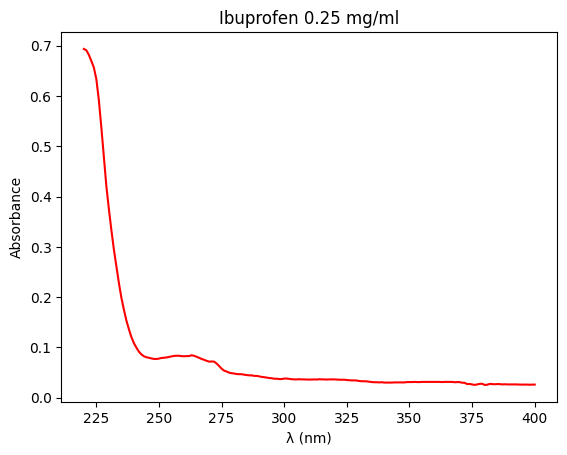

In [48]:
#Graficamos el Espectro UV del Ibuprofeno en una conentración de 0.25 mg/ml
plt.figure() 
plt.plot(wavelength, C3, color='red', linestyle='solid')
plt.title('Ibuprofen 0.25 mg/ml')
plt.xlabel('λ (nm)')
plt.ylabel('Absorbance')
plt.show() 

Cálculo del espectro UV promedio y su absorbancia máxima referente a las tres medidas tomadas de la concentración de 0.125 mg/ml de la solución de Ibuprofeno

In [49]:
#Lectura de datos
TablaC4= pd.read_excel('Medidas c4.xlsx')
TablaC4

,wavelength,value(m4_1),value(m4_2),value(m4_3)
0,220,0.383,0.389,0.394
1,221,0.381,0.387,0.392
2,222,0.376,0.382,0.387
3,223,0.369,0.375,0.379
4,224,0.361,0.366,0.371
...,...,...,...,...
176,396,0.018,0.019,0.019
177,397,0.018,0.019,0.019
178,398,0.018,0.019,0.019
179,399,0.018,0.019,0.019


In [50]:
#Seleccionamos los datos de forma individual
C4M1 = TablaC4['value(m4_1)']
C4M2 = TablaC4['value(m4_2)']
C4M3 = TablaC4['value(m4_3)']

In [51]:
#Se calcula el espectro promedio referente a la toma de las medidas
C4 = (C4M1+ C4M2 + C4M3) /3

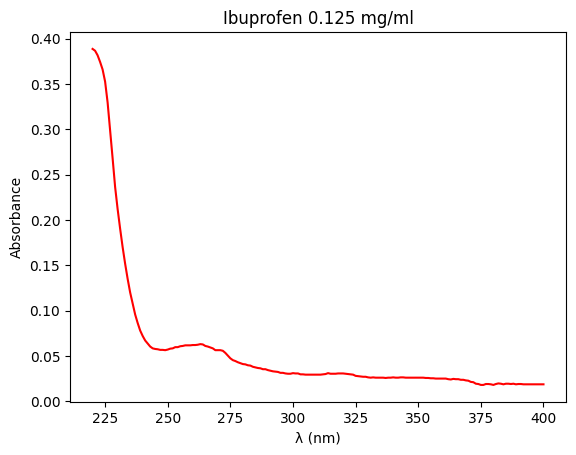

In [52]:
#Graficamos el Espectro UV del Ibuprofeno en una concentración de 0.125 mg/ml
plt.figure() 
plt.plot(wavelength, C4, color='red', linestyle='solid')
plt.title('Ibuprofen 0.125 mg/ml')
plt.xlabel('λ (nm)')
plt.ylabel('Absorbance')
plt.show() 

Cálculo del espectro UV promedio referente a las tres medidas tomadas de la concentración de 0.0625 mg/ml de la solución de Ibuprofeno

In [53]:
#Lectura de datos
TablaC5= pd.read_excel('Medidas c5.xlsx')
TablaC5

,wavelength,value(m5_1),value(m5_2),value(m5_3)
0,220,0.219,0.226,0.237
1,221,0.224,0.225,0.235
2,222,0.220,0.222,0.232
3,223,0.215,0.217,0.227
4,224,0.206,0.213,0.223
...,...,...,...,...
176,396,0.016,0.019,0.026
177,397,0.016,0.019,0.026
178,398,0.016,0.019,0.026
179,399,0.016,0.018,0.026


In [54]:
#Seleccionamos los datos de forma individual
C5M1 = TablaC5['value(m5_1)']
C5M2 = TablaC5['value(m5_2)']
C5M3 = TablaC5['value(m5_3)']

In [55]:
#Se calcula el espectro promedio referente a la toma de las medidas
C5 = (C5M1+ C5M2 + C5M3) /3

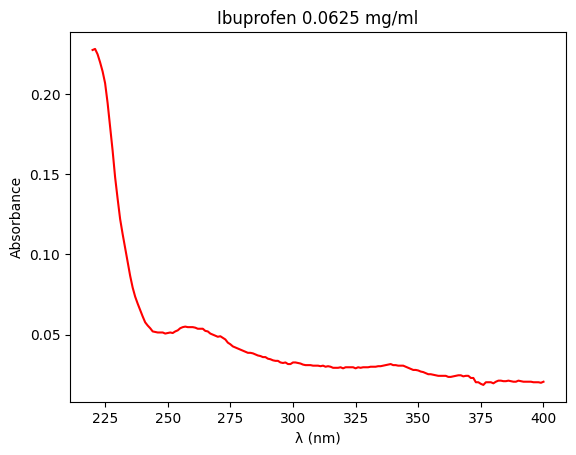

In [56]:
#Graficamos el Espectro UV del Ibuprofeno en una concentración de 0.0625 mg/ml
plt.figure() 
plt.plot(wavelength, C5, color='red', linestyle='solid')
plt.title('Ibuprofen 0.0625 mg/ml')
plt.xlabel('λ (nm)')
plt.ylabel('Absorbance')
plt.show() 

Cálculo del espectro UV promedio referente a las tres medidas tomadas de la concentración de 0.03125 mg/ml de la solución de Ibuprofeno

In [57]:
#Lectura de datos
TablaC6= pd.read_excel('Medidas c6.xlsx')
TablaC6

,wavelength,value(m6_1),value(m6_2),value(m6_3)
0,220,0.137,0.133,0.133
1,221,0.136,0.131,0.131
2,222,0.133,0.128,0.129
3,223,0.130,0.127,0.126
4,224,0.128,0.124,0.124
...,...,...,...,...
176,396,0.014,0.017,0.015
177,397,0.014,0.016,0.015
178,398,0.014,0.016,0.014
179,399,0.014,0.016,0.014


In [58]:
#Seleccionamos los datos de forma individual
C6M1 = TablaC6['value(m6_1)']
C6M2 = TablaC6['value(m6_2)']
C6M3 = TablaC6['value(m6_3)']

In [59]:
#Se calcula el espectro promedio referente a la toma de las medidas
C6 = (C6M1+ C6M2 + C6M3) /3

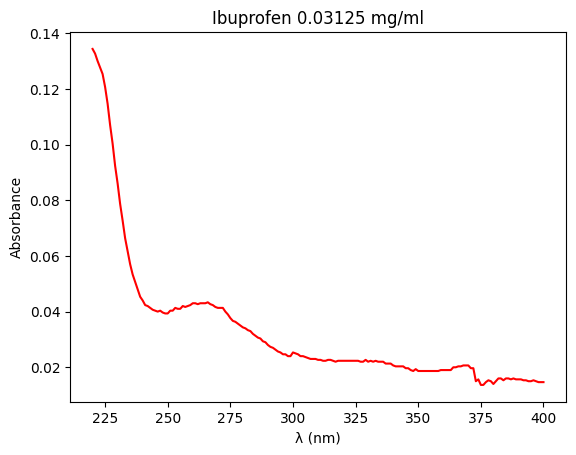

In [60]:
#Graficamos el Espectro UV del Ibuprofeno en una concentración de 0.03125 mg/ml
plt.figure() 
plt.plot(wavelength, C6, color='red', linestyle='solid')
plt.title('Ibuprofen 0.03125 mg/ml')
plt.xlabel('λ (nm)')
plt.ylabel('Absorbance')
plt.show() 

Cálculo de la absorbancia máxima en cada espectro UV de concentración

In [61]:
MaxAbM1= max(C1)
MaxAbM2= max(C2)
MaxAbM3= max(C3)
MaxAbM4= max(C4)
MaxAbM5= max(C5)
MaxAbM6= max(C6)

In [62]:
Absorbances= np.array([MaxAbM6, MaxAbM5, MaxAbM4, MaxAbM3, MaxAbM2, MaxAbM1])#Almacenamos los valores máximos de absorbancia en un arreglo
Concentrations= np.array([0.03125, 0.0625, 0.125, 0.25, 0.5 , 1]) #Almacenamos las concentraciones (mg/ml) tomadas en un arreglo" 

In [63]:
#Creamos el DataFrame que relaciona cada concentración con su punto máximo de absorbancia
Abosorbancemax = pd.DataFrame()
Abosorbancemax['Concentrations (mg/ml)']= Concentrations
Abosorbancemax['Absorbances']= Absorbances
Abosorbancemax

,Concentrations (mg/ml),Absorbances
0,0.03125,0.134333
1,0.06250,0.228000
2,0.12500,0.388667
3,0.25000,0.693667
4,0.50000,1.325333
5,1.00000,2.198667


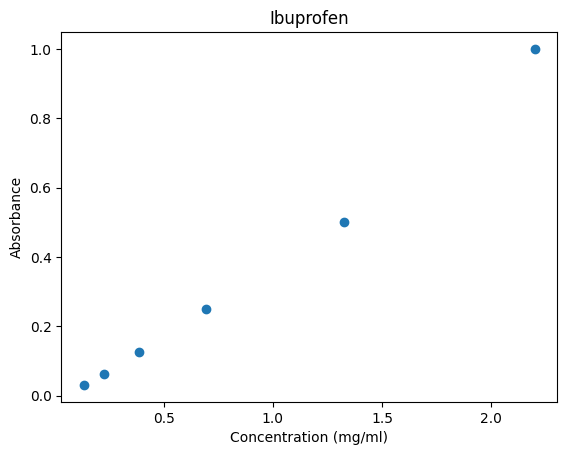

In [64]:
#Graficamos concentración vs punto máximo de absorbancia
plt.figure() 
plt.plot(Absorbances, Concentrations,"o")
plt.title('Ibuprofen')
plt.xlabel('Concentration (mg/ml)')
plt.ylabel('Absorbance')
plt.show()

Módelo de Regresión Lineal

In [65]:
from sklearn.linear_model import LinearRegression #Importar libreria referente al modelo de regresión lineal

In [66]:
Concentrations= np.array([0.03125, 0.0625, 0.125, 0.25, 0.5 , 1]).reshape(-1,1) #Normalizamos el arreglo de concentraciones

In [67]:
#Entrenamos el modelo con los valores de las concentraciones y sus absorbancias máximas 
model = LinearRegression()
model.fit(Concentrations, Absorbances) 
model = LinearRegression().fit(Concentrations, Absorbances)  

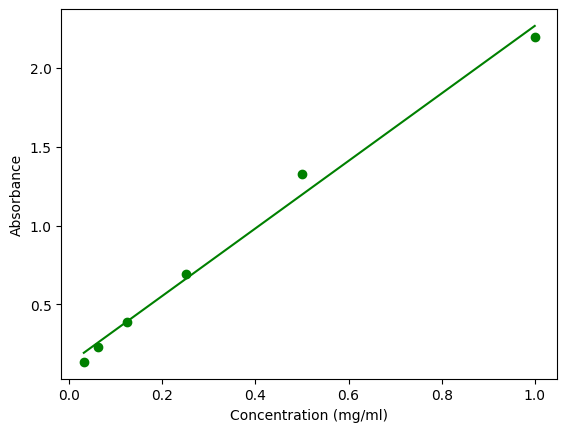

In [68]:
#Graficamos los resultados del modelo
plt.scatter(Concentrations, Absorbances,color='g')
plt.plot(Concentrations, model.predict(Concentrations),color='g')
plt.xlabel('Concentration (mg/ml)')
plt.ylabel('Absorbance')
plt.show()

In [69]:
#Métricas obtenidas del modelo
r_sq = model.score(Concentrations, Absorbances) #Coeficiente de determinación
print(f"Coeficiente de determinación: {r_sq}") 
print(f"Intercepto: {model.intercept_}") #Intercepto
print(f"Pendiente: {model.coef_}") #Pendiente

Coeficiente de determinación: 0.9915727579961867
Intercepto: 0.125334991708126
Pendiente: [2.14179389]


Con esto, obtenemos la ecuación que nos permitirá determinar la concentración de Ibuprofeno en solución por medio de Espectrofometría UV-VIS, conociendo el punto máximo de absorbancia en el espectro

Concentration (mg/ml)= (Absorbance Max - 0,12) / 2,14